# Frequency Modulated Continuous Radar (FMCW)
### Radar and Navigation - #1 Coding Task

---

*Developed by:*<br>
Naufal Mu'afi - 20/456724/TK/50548<br>
Department of Electrical and Information Engineering - UGM<br>
naufalmuafi@mail.ugm.ac.id<br>
<br>
*Reference:*<br>
P01_IsyaratKirim.m<br>
**copyright to** Mr. Iswandi

---

First, let's begin by importing the necessary modules for our program.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Secondly, let's move on to defining the constant and variable parameters for the Frequency Modulated Continuous Wave (FMCW) radar system.

In [2]:
# Constant
c = 3e8

# FMCW Signal Parameters
fc = 15e6    # Carrier Frequency (Hz)
bw = 1e5     # Bandwidth (Hz)
fr = 2       # Chirp Frequency (Hz)
tr = 1/fr    # Chirp period (Hz)

# Time Range
ns = 2**10                  # number of sample
tg = np.linspace(0, 1, ns)  # generation of time vector

Next, the first step in working with an FMCW radar system is to generate the transmitted signal. This signal is characterized by its frequency modulation as it continuously sweeps from a starting frequency to an ending frequency over a defined sweep time.

In [3]:
"""

Transmitted FMCW Signal Generation

"""

# initial condition
st = np.zeros(ns, dtype=complex)  # transmitted signal
ft = np.zeros(ns)                 # frequency of transmitted signal/sampling freq.

# Sampling Frequency (Hz)
for i in range(len(tg)):
    tg_i = tg[i]       # take the time value of the tg vector
    
    # for the chirp period after the first period
    while tg_i > tr:
        tg_i -= tr
        
    tg_i -= tr/2       # so that the frequency ft becomes the middle frequency
    st[i] = np.cos(2*np.pi*fc*tg_i + np.pi*bw*fr*(tg_i**2))
    ft[i] = fc + bw*fr*tg_i

After successfully sampling the transmitted FMCW signal, we can plot both the transmitted FMCW signal and its frequency variation. To do this, we can utilize the samples that we've collected and calculate the instantaneous frequency at each time step.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


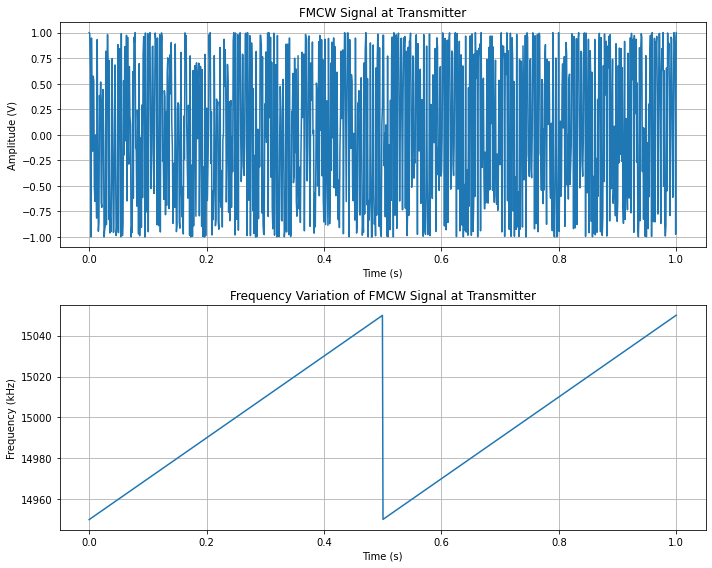

In [4]:
"""

FMCW Signal Plot

"""

# Transmiited FMCW Signal
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.plot(tg, st)
plt.title('FMCW Signal at Transmitter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

# Frequency Variation
plt.subplot(2, 1, 2)
plt.plot(tg, ft/1000)
plt.title('Frequency Variation of FMCW Signal at Transmitter')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.grid(True)

plt.tight_layout()
plt.show()

Next, let's assume that our radar system has detected a **target**, which happens to be a ship.

In [5]:
# Target Parameters
Rt = 45e3  # Target Distance (m)
Vt = 10    # Target radial velocity (m/s)

The second step in working with an FMCW radar system is to generate the received signal. This signal is characterized by its interaction with the target, which results in a radar echo. The received signal contains valuable information about the target's properties

In [6]:
"""

FMCW Signal Generation at Receiver/Reflected Signal

"""

# initial condition
srx = np.zeros(ns, dtype=complex)  # receiver signal that transmitted
frx = np.zeros(ns)                 # frequency of received signal

for i in range(len(tg)):
    tg_i = tg[i]       # take the time value of the tg vector
    
    # calculate the time delay for receiving signals due to the distance factor
    t_delay = 2*Rt/c
    # calculates the signal time delay due to target movement
    t_delay += (2*tg_i*Vt/c)
    
    tg_i -= t_delay
    
    # for the chirp period after the first period
    while tg_i > tr:
        tg_i -= tr
    
    tg_i -= tr/2       # so that the frequency ft becomes the middle frequency
    srx[i] = np.cos(2 * np.pi * fc * tg_i + np.pi * bw * fr * (tg_i**2))
    frx[i] = fc + bw*fr*tg_i

After successfully sampling the FMCW signal at Receiver, we can plot both the signal and its frequency variation. To do this, we can utilize the samples that we've collected and calculate the instantaneous frequency at each time step.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


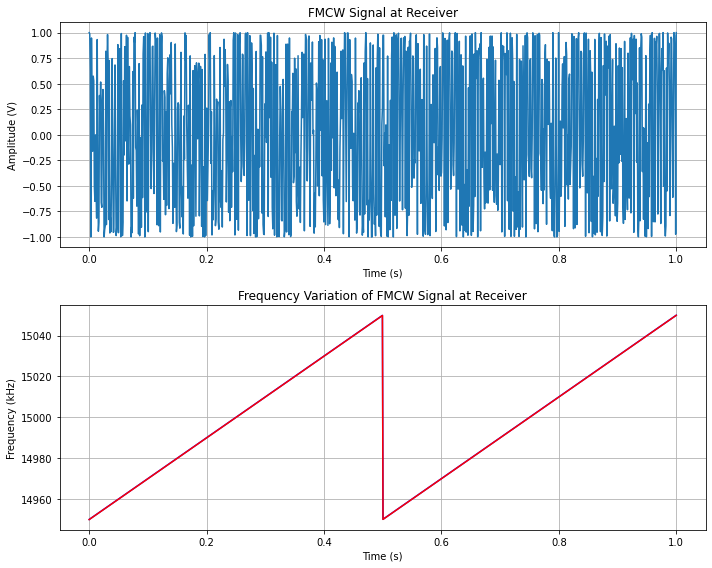

In [7]:
"""

FMCW Signal at Receiver Plot

"""

# FMCW Signal at Receiver
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.plot(tg, st)
plt.title('FMCW Signal at Receiver')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

# Frequency Variation
plt.subplot(2, 1, 2)
plt.plot(tg, ft/1000, 'b')
plt.plot(tg, frx/1000, 'r')
plt.title('Frequency Variation of FMCW Signal at Receiver')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.grid(True)

plt.tight_layout()
plt.show()

We can add some noise to the system with incorporate Gaussian noise into the FMCW signal at Receiver. Gaussian noise is a common method for simulating random interference in radar systems. This noise, which follows a Gaussian (normal) distribution, mimics various sources of unwanted signal variations and disturbances that can affect radar data.

In [8]:
"""

add Gaussian Noise

"""

def noise(sig, req_snr):
    sig_energy = np.linalg.norm(sig) ** 2            # energy of the signal
    noise_energy = sig_energy / (10 ** (req_snr/10)) # energy of noise to be added
    noise_var = noise_energy / (len(sig) - 1)        # variance of noise
    noise_std = np.sqrt(noise_var)                   # std. deviation of noise
    noise = noise_std * np.random.randn(*sig.shape)  # noise
    noisy_sig = sig + noise                          # noisy signal
    
    return noisy_sig

srn = noise(srx, 10)

and the signal of our FMCW Radar will become:

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


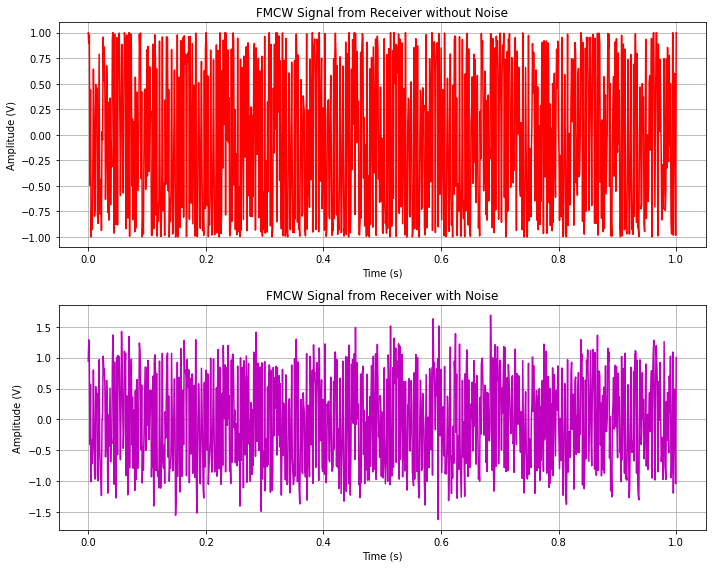

In [9]:
"""

Plot Signals with and without Noise

"""

# w/o Noise
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.plot(tg, srx, 'r')
plt.title('FMCW Signal from Receiver without Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

# w/ Noise
plt.subplot(2, 1, 2)
plt.plot(tg, srn, 'm')
plt.title('FMCW Signal from Receiver with Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

plt.tight_layout()
plt.show()

Then, we can process the signal using a demodulation method, which will generate the plot of the received FMCW signal in the time domain and we can convert to frequency domain with FFT.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


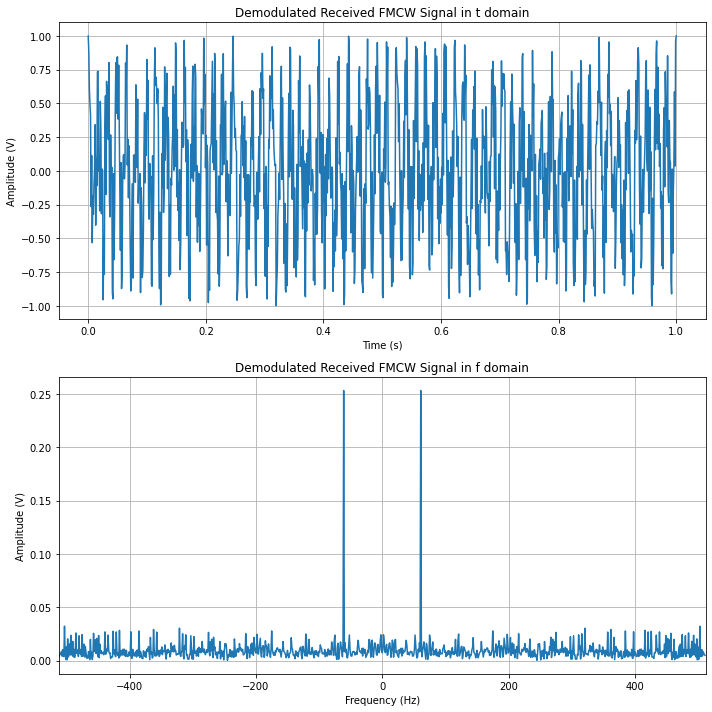

In [10]:
"""

Signal Processing

"""

# Demodulation
s_demod = srx * st

"""

Convert to Frequency Domain with FFT

"""

n_fft = 2**int(np.ceil(np.log2(len(s_demod))))
s_fft = np.fft.fftshift(np.fft.fft(s_demod, n_fft) / len(tg))
f_axis = np.fft.fftshift(np.fft.fftfreq(n_fft, d=1/ns))

# Plot with Demodulation
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(tg, s_demod)
plt.title('Demodulated Received FMCW Signal in t domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(f_axis, np.abs(s_fft))
plt.xlim([-ns/2, ns/2])
plt.title('Demodulated Received FMCW Signal in f domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# Identify the peak frequency by using the median value of the signal in the FFT
m = len(s_fft) // 2
peak, _ = find_peaks(np.abs(s_fft[m:]), height=0.2)
fd = f_axis[m + peak]
print(f"Peak Frequencies: {fd} Hz")

# Calculate Target Range
rest = c * fd * tr / (2*bw)
print(f"Estimated target range: {rest/1000} km")

Peak Frequencies: [61.] Hz
Estimated target range: [45.75] km


<hr>